In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'the-oxfordiiit-pet-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F112480%2F268736%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240918%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240918T134002Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6b345fa3eef1152cc0f969d096061827947e1b2d9f3fa8f37a7dff801dbbed23fdc6c0fec9f12c67a8282dd4c42f26d2750164884253a442da19554e7aac19b39a3efd436808e8f50609580251daa2a37116f123b17e56cee58091ea95c86f1d61c9110ebb91e3a3945cbbb9f4597883120fcf60617ae9e4e3607f0b6afb3b94a56eccdcd40032c37c7600a6e57223f6156102ddfb34b1d4c6c826a50a72685a928d2ef24efd801c9069878d066d4afe272f660fe9923a1a2a022ef62dec25fef8975a031780954246b9ee5c5a8878471e428d7860cafd23f8492283673a2583796c5c40680e8b18f2b1d740b2fbe7dc19cb20175e47ae80798d36276c5b8118,annotation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5727113%2F9427642%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240918%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240918T134002Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D760228c5a29215182d535d832c3daa4f4050cb22d3a530822d6d9fbd3b7a6ecad5a34e73077f0f36ed20c4e3996ae372821611ef7495353310042ea11db0d68495cb2508e496d87d9ba1d49adb946090592f868a5fc66776fc183fcf5e2585e42b0d6e6baca5e750b4c650b1a40783833920fe99787f9e71411e175588bf7c1f7db2f52b18d479198bccb62906e894a58004805ee06e0da607548360be3bc6bc1bbc376f7f1d9b1173ed79b3c44a0b62d3da203a2ea9fd58c808649ec33aae881c1a50b5d6159ea4fa1e83490272cc2671244d65309c9c9e903027ea633d2587572973cbd11a139cd4fc9929f84294a71c9deacd510af61c0dbf7fa5d3812ee5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1585267331 bytes downloaded
Downloaded and uncompressed: the-oxfordiiit-pet-dataset
[==================================================] 18875 bytes downloaded
Downloaded and uncompressed: annotation
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/beagle_33.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/chihuahua_193.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/american_pit_bull_terrier_46.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Russian_Blue_91.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/scottish_terrier_65.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/Russian_Blue_201.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/english_setter_126.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/keeshond_59.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/pug_56.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/shiba_inu_23.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/beagle_16.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/english_setter_25.jpg
/kaggle/input/the-oxfordiiit-pet-dataset/images/images/B

In [3]:
import os
os.listdir('/kaggle/input')


['annotation', 'the-oxfordiiit-pet-dataset']

# Required imports

In [4]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import to_pil_image


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
images_file = "/kaggle/input/the-oxfordiiit-pet-dataset/images"

# Display some images from the dataset

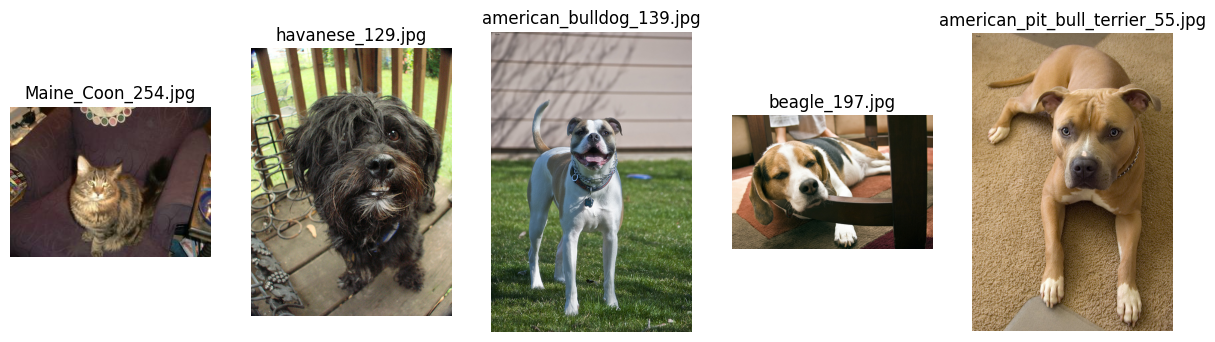

In [6]:
def display_first_n_images(img_dir, n=5):
    # Get a list of image file names from the directory
    img_files = [f for f in os.listdir(images_file) if f.endswith('.jpg') or f.endswith('.png')]

    # Limit the number of images to display
    img_files = img_files[:n]

    # Create a plot with subplots
    plt.figure(figsize=(15, 10))

    # Loop through the image files and display each one
    for i, img_file in enumerate(img_files):
        img_path = os.path.join(img_dir, img_file)
        image = Image.open(img_path).convert('RGB')

        # Display the image
        plt.subplot(1, n, i + 1)
        plt.imshow(image)
        plt.axis('off')  # Hide axis
        plt.title(img_file)  # Show file name as title

    plt.show()

# Use the function to display the first 5 images
display_first_n_images(images_file, n=5)


The images have a large variations in scale, pose and lighting.


# Step 1: Extract and Organize Data


		ID: 1:37 Class ids
        
		SPECIES: 1:Cat 2:Dog
        
		BREED ID: 1-25:Cat 1:12:Dog
        
		All images with 1st letter as captial are cat images while images with small first letter are dog images.

In [7]:
# Load list.txt
list_file = os.path.join('/kaggle/input/annotation', 'list.txt') #Combined list of all images in the dataset Each entry in the file is of following nature: Image CLASS-ID SPECIES BREED ID

# Read the file skipping the first 6 lines (header)
with open(list_file, 'r') as f:
    lines = f.readlines()[6:]

# Create a dataframe with columns: Image, Class ID, Species, Breed ID
data = [line.strip().split() for line in lines]
df = pd.DataFrame(data, columns=['Image', 'Class_ID', 'Species', 'Breed_ID'])

# Convert data types
df['Class_ID'] = df['Class_ID'].astype(int)
df['Species'] = df['Species'].astype(int)  # 1: Cat, 2: Dog
df['Breed_ID'] = df['Breed_ID'].astype(int)

# Show the first few rows of the dataframe
df.head(10)

Image  Class_ID  Species  Breed_ID
0  Abyssinian_100         1        1         1
1  Abyssinian_101         1        1         1
2  Abyssinian_102         1        1         1
3  Abyssinian_103         1        1         1
4  Abyssinian_104         1        1         1
5  Abyssinian_105         1        1         1
6  Abyssinian_106         1        1         1
7  Abyssinian_107         1        1         1
8  Abyssinian_108         1        1         1
9  Abyssinian_109         1        1         1

In [9]:
# Get the number of rows in the dataframe
print(f'The length of the dataframe is: {len(df)}')


The length of the dataframe is: 7349


In [11]:
# Print unique Class IDs
unique_class_ids = df['Class_ID'].unique()
print("\nUnique Class IDs:")
print(unique_class_ids)

# Print unique Species values
unique_species = df['Species'].unique()
print("\nUnique Species values:")
print(unique_species)

# Print unique Breed IDs
unique_breed_ids = df['Breed_ID'].unique()
print("\nUnique Breed IDs:")
print(unique_breed_ids)


Unique Class IDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]

Unique Species values:
[1 2]

Unique Breed IDs:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


## Split the dataset

The split ratio(80% for training and validation, 20% for testing) is a commonly used practice in machine learning, it ensures that there is a decent amount of data in both sets to avoid skewed or biased results during model tuning.

In [10]:
# First, split the dataset into 80% training + validation, and 20% test
trainval_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Class_ID'])

# Now, split the remaining 80% into 80% training and 20% validation
train_df, val_df = train_test_split(trainval_df, test_size=0.2, random_state=42, stratify=trainval_df['Class_ID'])

# Check the sizes of each split
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Training set size: 4703
Validation set size: 1176
Test set size: 1470


##Class for loading the pet images and their labels

In [12]:
class PetDataset(Dataset):
    # Constructor to initialize the dataset
    def __init__(self, data, transform=None):
        """
        Args:
        - data: A pandas DataFrame containing image names, class IDs, species, and breed IDs.
        - img_dir: Directory where the images are stored.
        - transform]: A function/transform to apply to the images.
        """
        self.data = data  # Store the dataset metadata (image names, class IDs, etc.)
        self.img_dir = images_file  # Store the directory where the images are located
        self.transform = transform  # Store any transformations to be applied to the images

    # Method to return the total number of items in the dataset
    def __len__(self):
        """
        Returns:
        - int: The number of samples in the dataset.
        """
        return len(self.data)  # Return the number of rows in the dataframe (number of images)

    # Method to load and return a single sample from the dataset
    def __getitem__(self, idx):
        """
        Args:
        - idx (int): The index of the sample to retrieve.

        Returns:
        - tuple: (image, label), where:
            - image (PIL Image or Tensor): The loaded image (with transformations applied if given).
            - label (int): The corresponding class label (adjusted to be 0-based).
        """
        # Retrieve the image file name (without extension) from the dataset and construct the full path
        img_name = os.path.join(self.img_dir, self.data.iloc[idx, 0] + '.jpg')

        # Open the image and convert it to RGB format (in case it's grayscale or other formats)
        image = Image.open(img_name).convert('RGB')

        # Retrieve the class ID from the dataset and adjust it to be zero-indexed (subtract 1)
        # The dataset class IDs are 1 to 37, so I subtract 1 to make it 0 to 36
        label = self.data.iloc[idx, 1] - 1

        # If a transformation is provided, apply it to the image
        if self.transform:
            image = self.transform(image)

        # Return the transformed image and the corresponding label
        return image, label


## Load the Models weights and the necessary transformation

the transformation pipeline for ResNet

```
Resnet_transform = T.Compose([
    # Step 1: Resize the image to 232x232 pixels using bilinear interpolation.
    # This helps to create a buffer for the center crop that follows.
    T.Resize(232, interpolation=T.InterpolationMode.BILINEAR),
    
    # Step 2: Crop the center 224x224 pixels from the resized image.
    # The model expects 224x224 input, and this ensures a consistent size.
    T.CenterCrop(224),
    
    # Step 3: Convert the image from a PIL image (or NumPy array) to a PyTorch tensor.
    # Additionally, it scales the pixel values from [0, 255] to [0, 1] by dividing by 255..
    T.ToTensor(),
    
    # Step 4: Normalize the image using the mean and std deviation of ImageNet dataset.
    # These values (mean and std) were used when training the model on ImageNet, so they ensure the input is processed in a way that is compatible with the pretrained weights.
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])


```




ResNet and VGG expect input images of size 224x224 pixels, so the preprocessing is the same for these models.

In [13]:
# Load pretrained weights for various models
ResNet50_weights = models.resnet.ResNet50_Weights.DEFAULT
ResNet34_weights = models.resnet.ResNet34_Weights.DEFAULT

# Get the preprocessing transforms required by each model
preprocess = ResNet34_weights.transforms()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:12<00:00, 42.7MB/s]


## Create dataset instances and dataloaders

In [14]:
# Create dataset instances
train_dataset = PetDataset(data=train_df, transform=preprocess)
val_dataset = PetDataset(data=val_df, transform=preprocess)
test_dataset = PetDataset(data=test_df, transform=preprocess)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)
#num_workers=4 Multiple subprocesses are used to load data in parallel, improving the performance when loading large datasets or performing intensive preprocessing tasks.

#Number of Batches
print("Train batches:", len(train_loader))
print("Val batches:",len(val_loader))
print("Test batches:",len(test_loader))

Train batches: 294
Val batches: 74
Test batches: 92


## Visualize the image before and after the transformation.


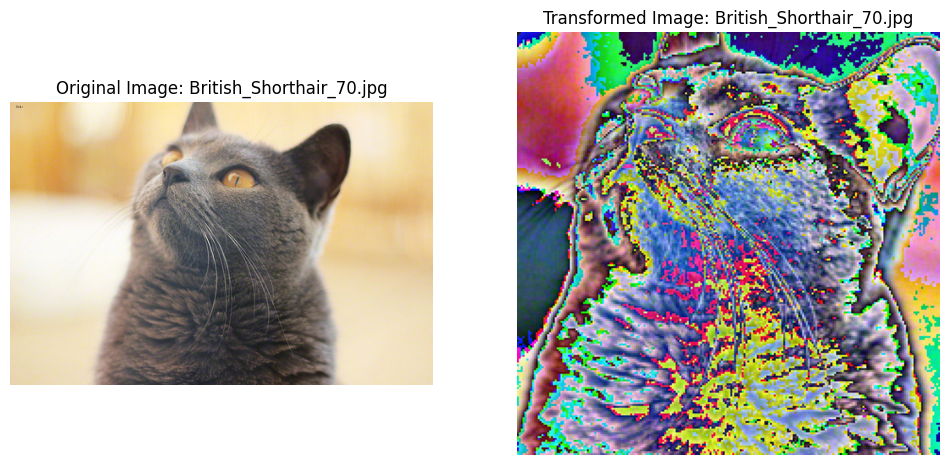

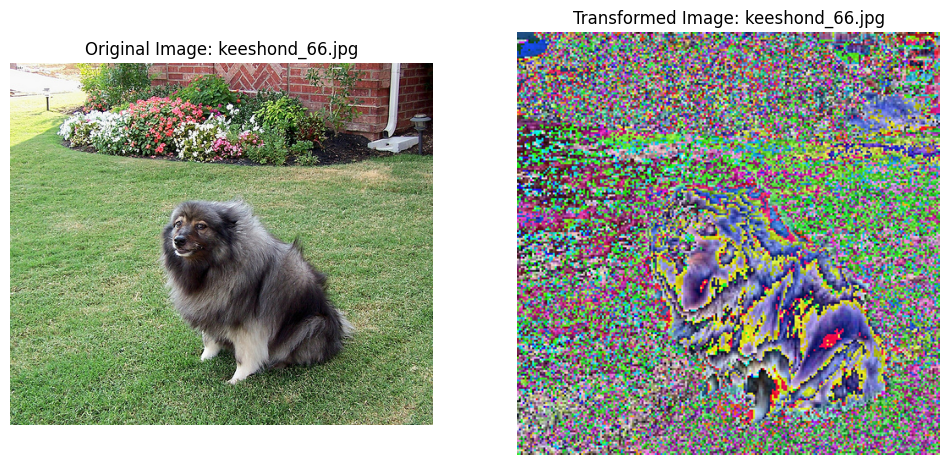

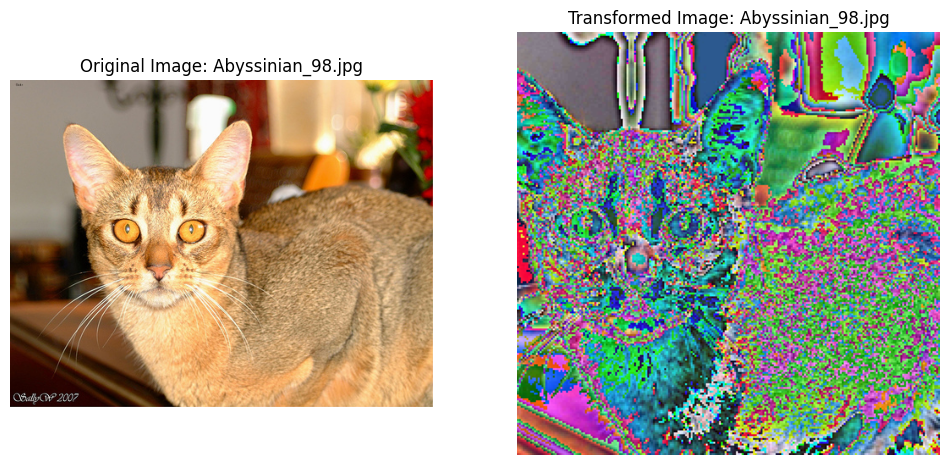

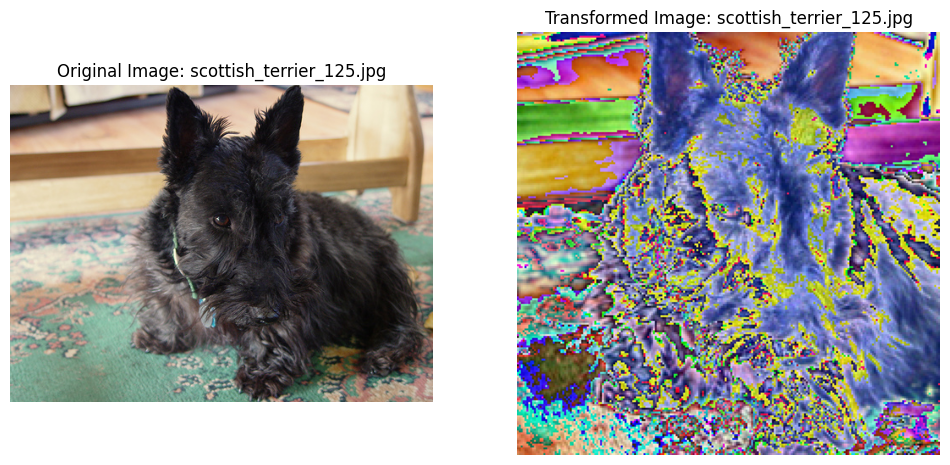

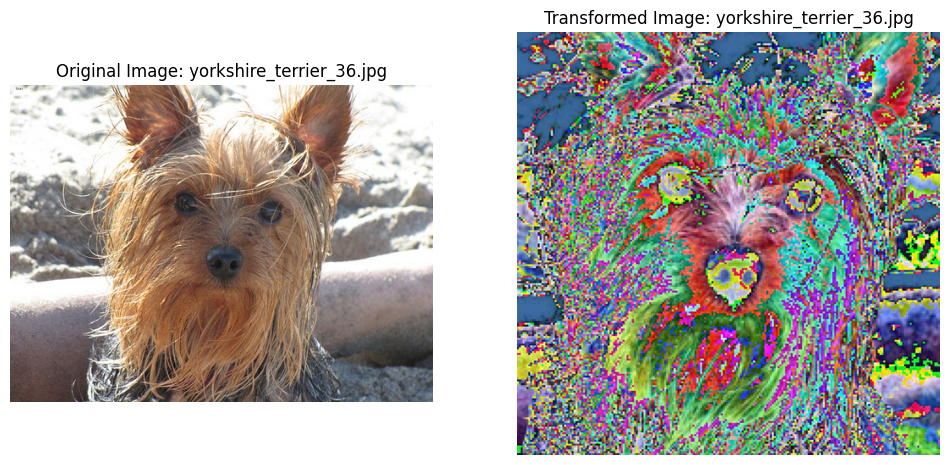

In [15]:
def visualize_before_after(dataset, idx):
    """
    Visualizes the image before and after the transformation.

    Args:
    - dataset: The dataset instance (train_dataset or val_dataset).
    - idx: The index of the sample to visualize.
    """

    # Retrieve the image and label from the dataset
    img_name = dataset.data.iloc[idx, 0] + '.jpg'
    img_path = os.path.join(dataset.img_dir, img_name)

    # Load the image before transformation
    original_image = Image.open(img_path).convert('RGB')

    # Get the transformed image (after transformation)
    transformed_image, label = dataset[idx]  # This returns the transformed image and label

    # Convert the transformed tensor back to a PIL image for visualization
    transformed_image_pil = to_pil_image(transformed_image) if isinstance(transformed_image, torch.Tensor) else transformed_image

    # Plot original image and transformed image side by side
    plt.figure(figsize=(12, 6))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title(f"Original Image: {img_name}")
    plt.axis('off')

    # Show transformed image
    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image_pil)
    plt.title(f"Transformed Image: {img_name}")
    plt.axis('off')

    plt.show()

# Visualize the first 5 images in the training set before and after transformation
for i in range(5):
    visualize_before_after(train_dataset, i)


The change in colors after applying the transformations is due to the normalization step in the preprocessing pipeline. The pretrained ResNet model expects the images to be normalized with specific mean and standard deviation values, typically for each RGB channel.

# Step 2: Model Development

## Load the model

In [16]:
class CustomResNet50(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet50, self).__init__()

        # Load pretrained ResNet50
        resnet50_base = models.resnet50(pretrained=True)

        # Remove the final fully connected layer and keep the feature extraction layers
        self.resnet50_features = nn.Sequential(*list(resnet50_base.children())[:-2])
        self.resnet50_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Initialize a dummy input to get the output size of the feature extractor
        dummy_input = torch.zeros(1, 3, 224, 224)
        with torch.no_grad():
            x = self.resnet50_features(dummy_input)
            x = self.resnet50_pool(x)
            self.resnet50_out_features = x.numel()

        # Define the custom layers
        self.resnet50_custom = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.resnet50_out_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.resnet50_features(x)
        x = self.resnet50_pool(x)
        x = self.resnet50_custom(x)
        return x



In [17]:
class CustomResNet34(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet34, self).__init__()

        # Load pretrained ResNet34
        resnet34_base = models.resnet34(pretrained=True)

        # Remove the final fully connected layer and keep the feature extraction layers
        self.resnet34_features = nn.Sequential(*list(resnet34_base.children())[:-2])
        self.resnet34_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Initialize a dummy input to get the output size of the feature extractor
        dummy_input = torch.zeros(1, 3, 224, 224)
        with torch.no_grad():
            x = self.resnet34_features(dummy_input)
            x = self.resnet34_pool(x)
            self.resnet34_out_features = x.numel()

        # Define the custom layers
        self.resnet34_custom = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.resnet34_out_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.resnet34_features(x)
        x = self.resnet34_pool(x)
        x = self.resnet34_custom(x)
        return x


In [20]:
# Instantiate the models
num_classes = len(df['Class_ID'].unique())  # Number of classes in your dataset
resnet34_model = CustomResNet34(num_classes=num_classes)
resnet50_model = CustomResNet50(num_classes=num_classes)

# Move models to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet34_model.to(device)
resnet50_model.to(device)

# Print model architectures to confirm
print(resnet34_model)
print(resnet50_model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weig

CustomResNet34(
  (resnet34_features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

## Define loss function and optimizer

In [22]:
criterion = nn.CrossEntropyLoss()


learning_rates = [
    # 0.01 , 0.001 , 0.0001
    0.00001, 0.00005]
optimizers = ['Adam', 'SGD']
models_list = [resnet50_model, resnet34_model]
model_names = ['ResNet50', 'ResNet34']


def create_optimizer(model, optimizer_name, lr):
    if optimizer_name == 'Adam':
        return optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == 'SGD':
        return optim.SGD(model.parameters(), lr=lr)


## Training phase

In [28]:
def train_model(model, criterion, optimizer, num_epochs=10):
    """
    Trains the model for a given number of epochs.

    Args:
        model (torch.nn.Module): The model to be trained.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for training.
        num_epochs (int): Number of epochs for training.

    Returns:
        train_losses (list): List of training losses.
        val_losses (list): List of validation losses.
        best_model (torch.nn.Module): The model with the best performance.
        best_val (float): Best validation accuracy.
    """

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val = 0
    for epoch in range(num_epochs):

        # Training Phase
        model.train()
        running_loss = 0.0
        correct_train_preds = 0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Zero gradients for every batch!
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)  # Computes the maximum value across dimension 1 (class dimension)
            correct_train_preds += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_train_preds / len(train_dataset)

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}')

        # Validation Phase
        model.eval()
        correct_val_preds = 0
        running_val_loss = 0.0

        with torch.no_grad():
            for i, (inputs, labels) in enumerate(val_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

                _, preds = torch.max(outputs, 1)
                correct_val_preds += torch.sum(preds == labels.data)

        val_loss_avg = running_val_loss / len(val_loader)
        val_acc = correct_val_preds.double() / len(val_dataset)

        val_losses.append(val_loss_avg)
        val_accuracies.append(val_acc.item())
        print(f'Validation Loss: {val_loss_avg:.4f}, Validation Accuracy: {val_acc:.4f}')

        # Save the best model so far
        if best_val < val_acc:
            best_val = val_acc
            best_model = model


    return train_losses, val_losses, train_accuracies, val_accuracies, best_model, best_val

In [25]:
def test_model(model, test_loader):
    model.eval()
    running_test_loss = 0.0
    correct_test_preds = 0

    criterion = nn.CrossEntropyLoss()  # or whatever criterion you used

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_test_preds += torch.sum(preds == labels.data)

    test_loss_avg = running_test_loss / len(test_loader)
    test_accuracy = correct_test_preds.double() / len(test_loader.dataset)

    return test_loss_avg, test_accuracy


In [29]:
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, num_epochs):
    epochs = range(1, num_epochs + 1)

    # Plot Losses
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Losses over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Accuracies over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


Training ResNet50 with Adam optimizer and learning rate 1e-05
Epoch 1/10, Training Loss: 0.0104, Training Accuracy: 0.9987
Validation Loss: 0.2876, Validation Accuracy: 0.9294
Epoch 2/10, Training Loss: 0.0106, Training Accuracy: 0.9983
Validation Loss: 0.3061, Validation Accuracy: 0.9260
Epoch 3/10, Training Loss: 0.0107, Training Accuracy: 0.9981
Validation Loss: 0.3168, Validation Accuracy: 0.9286
Epoch 4/10, Training Loss: 0.0071, Training Accuracy: 0.9994
Validation Loss: 0.3244, Validation Accuracy: 0.9277
Epoch 5/10, Training Loss: 0.0097, Training Accuracy: 0.9987
Validation Loss: 0.3054, Validation Accuracy: 0.9345
Epoch 6/10, Training Loss: 0.0097, Training Accuracy: 0.9985
Validation Loss: 0.3191, Validation Accuracy: 0.9260
Epoch 7/10, Training Loss: 0.0067, Training Accuracy: 0.9985
Validation Loss: 0.3326, Validation Accuracy: 0.9269
Epoch 8/10, Training Loss: 0.0082, Training Accuracy: 0.9981
Validation Loss: 0.3456, Validation Accuracy: 0.9252
Epoch 9/10, Training Loss:

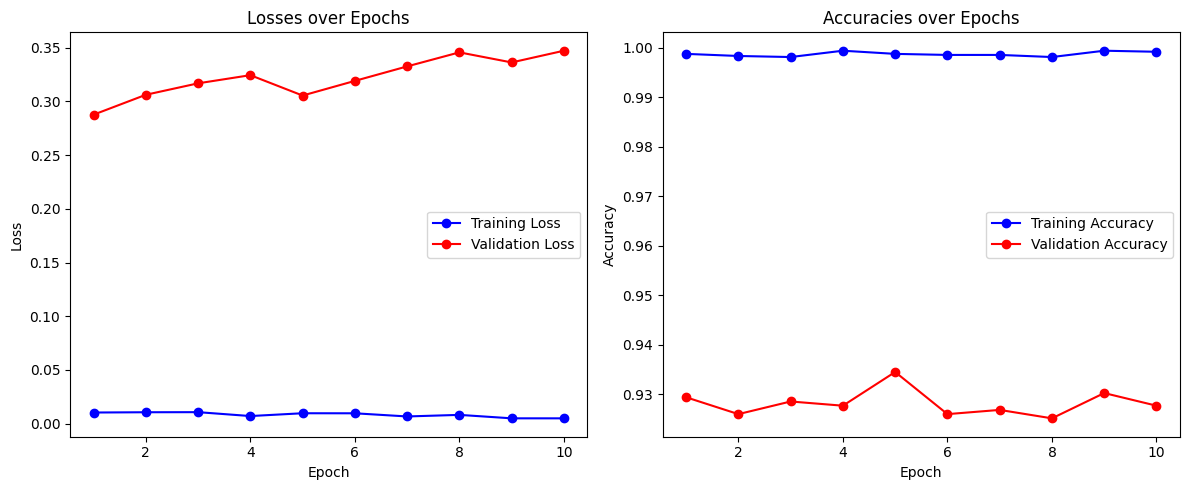

Training ResNet50 with SGD optimizer and learning rate 1e-05
Epoch 1/10, Training Loss: 0.0066, Training Accuracy: 0.9994
Validation Loss: 0.3427, Validation Accuracy: 0.9260
Epoch 2/10, Training Loss: 0.0095, Training Accuracy: 0.9985
Validation Loss: 0.3468, Validation Accuracy: 0.9235
Epoch 3/10, Training Loss: 0.0071, Training Accuracy: 0.9987
Validation Loss: 0.3338, Validation Accuracy: 0.9286
Epoch 4/10, Training Loss: 0.0080, Training Accuracy: 0.9987
Validation Loss: 0.3398, Validation Accuracy: 0.9294
Epoch 5/10, Training Loss: 0.0085, Training Accuracy: 0.9987
Validation Loss: 0.3397, Validation Accuracy: 0.9260
Epoch 6/10, Training Loss: 0.0051, Training Accuracy: 0.9994
Validation Loss: 0.3444, Validation Accuracy: 0.9260
Epoch 7/10, Training Loss: 0.0066, Training Accuracy: 0.9991
Validation Loss: 0.3401, Validation Accuracy: 0.9286
Epoch 8/10, Training Loss: 0.0074, Training Accuracy: 0.9981
Validation Loss: 0.3508, Validation Accuracy: 0.9269
Epoch 9/10, Training Loss: 

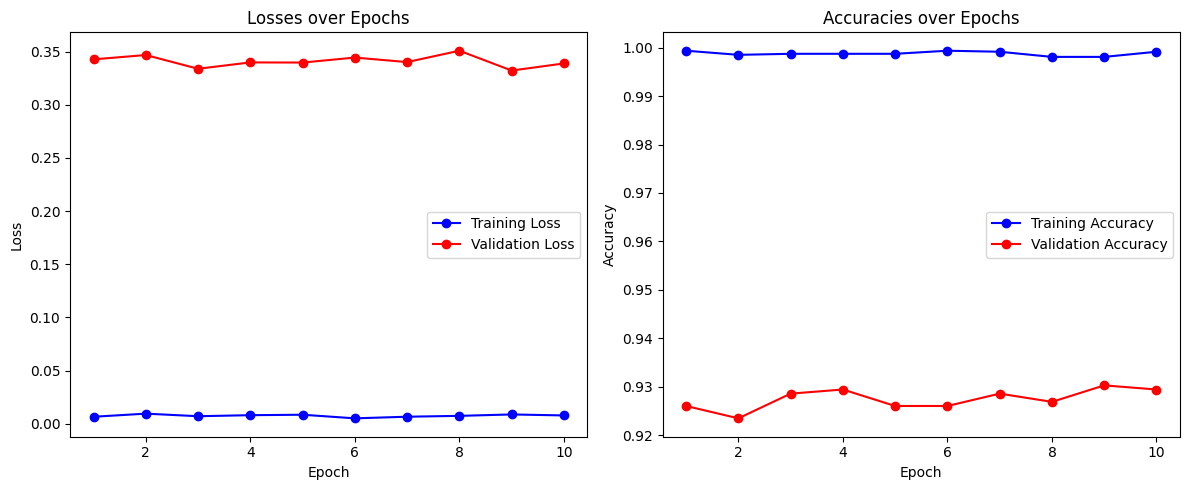

Training ResNet50 with Adam optimizer and learning rate 5e-05
Epoch 1/10, Training Loss: 0.0526, Training Accuracy: 0.9862
Validation Loss: 0.4309, Validation Accuracy: 0.8997
Epoch 2/10, Training Loss: 0.1015, Training Accuracy: 0.9724
Validation Loss: 0.4953, Validation Accuracy: 0.8980
Epoch 3/10, Training Loss: 0.0922, Training Accuracy: 0.9734
Validation Loss: 0.3743, Validation Accuracy: 0.9150
Epoch 4/10, Training Loss: 0.0741, Training Accuracy: 0.9796
Validation Loss: 0.4186, Validation Accuracy: 0.9048
Epoch 5/10, Training Loss: 0.0623, Training Accuracy: 0.9821
Validation Loss: 0.3936, Validation Accuracy: 0.9099
Epoch 6/10, Training Loss: 0.0646, Training Accuracy: 0.9794
Validation Loss: 0.4250, Validation Accuracy: 0.8920
Epoch 7/10, Training Loss: 0.0496, Training Accuracy: 0.9849
Validation Loss: 0.4192, Validation Accuracy: 0.8988
Epoch 8/10, Training Loss: 0.0481, Training Accuracy: 0.9868
Validation Loss: 0.4567, Validation Accuracy: 0.8920
Epoch 9/10, Training Loss:

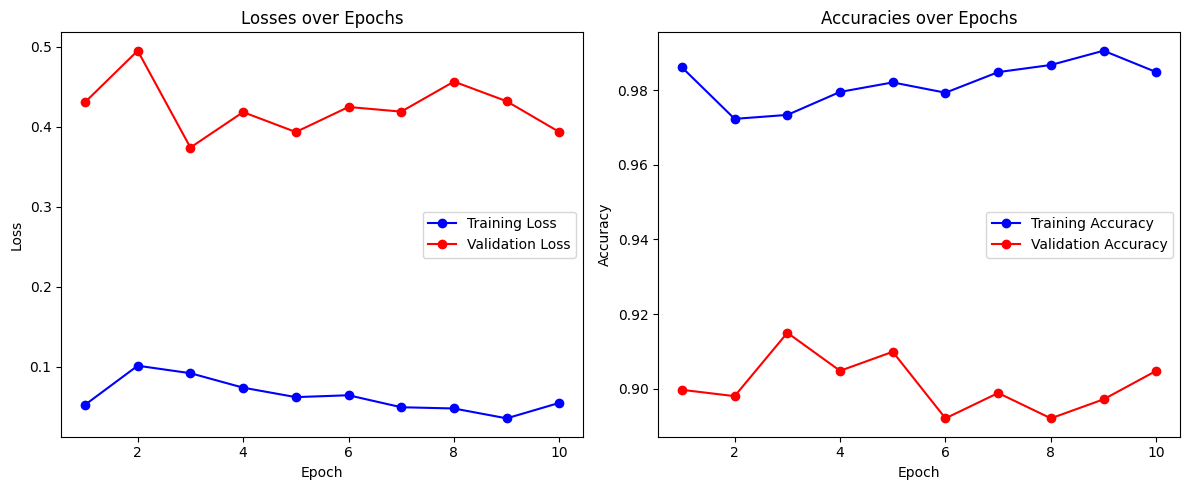

Training ResNet50 with SGD optimizer and learning rate 5e-05
Epoch 1/10, Training Loss: 0.0398, Training Accuracy: 0.9885
Validation Loss: 0.4100, Validation Accuracy: 0.9031
Epoch 2/10, Training Loss: 0.0345, Training Accuracy: 0.9898
Validation Loss: 0.3930, Validation Accuracy: 0.9014
Epoch 3/10, Training Loss: 0.0338, Training Accuracy: 0.9921
Validation Loss: 0.3856, Validation Accuracy: 0.9082
Epoch 4/10, Training Loss: 0.0298, Training Accuracy: 0.9906
Validation Loss: 0.3857, Validation Accuracy: 0.9073
Epoch 5/10, Training Loss: 0.0280, Training Accuracy: 0.9928
Validation Loss: 0.3734, Validation Accuracy: 0.9133
Epoch 6/10, Training Loss: 0.0255, Training Accuracy: 0.9943
Validation Loss: 0.3849, Validation Accuracy: 0.9090
Epoch 7/10, Training Loss: 0.0296, Training Accuracy: 0.9928
Validation Loss: 0.3663, Validation Accuracy: 0.9107
Epoch 8/10, Training Loss: 0.0217, Training Accuracy: 0.9930
Validation Loss: 0.3641, Validation Accuracy: 0.9116
Epoch 9/10, Training Loss: 

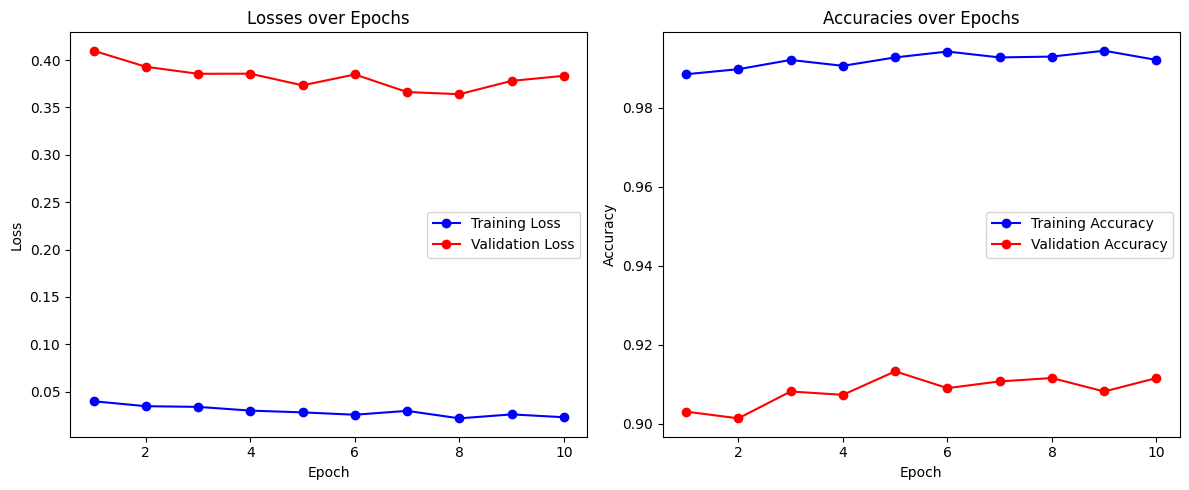

Training ResNet34 with Adam optimizer and learning rate 1e-05
Epoch 1/10, Training Loss: 3.2729, Training Accuracy: 0.2022
Validation Loss: 2.6503, Validation Accuracy: 0.6709
Epoch 2/10, Training Loss: 2.3822, Training Accuracy: 0.5911
Validation Loss: 1.6584, Validation Accuracy: 0.8248
Epoch 3/10, Training Loss: 1.6206, Training Accuracy: 0.7631
Validation Loss: 0.9659, Validation Accuracy: 0.8827
Epoch 4/10, Training Loss: 1.0704, Training Accuracy: 0.8458
Validation Loss: 0.6076, Validation Accuracy: 0.9107
Epoch 5/10, Training Loss: 0.7379, Training Accuracy: 0.8962
Validation Loss: 0.4195, Validation Accuracy: 0.9209
Epoch 6/10, Training Loss: 0.5116, Training Accuracy: 0.9326
Validation Loss: 0.3325, Validation Accuracy: 0.9269
Epoch 7/10, Training Loss: 0.3680, Training Accuracy: 0.9536
Validation Loss: 0.2996, Validation Accuracy: 0.9294
Epoch 8/10, Training Loss: 0.2690, Training Accuracy: 0.9694
Validation Loss: 0.2705, Validation Accuracy: 0.9269
Epoch 9/10, Training Loss:

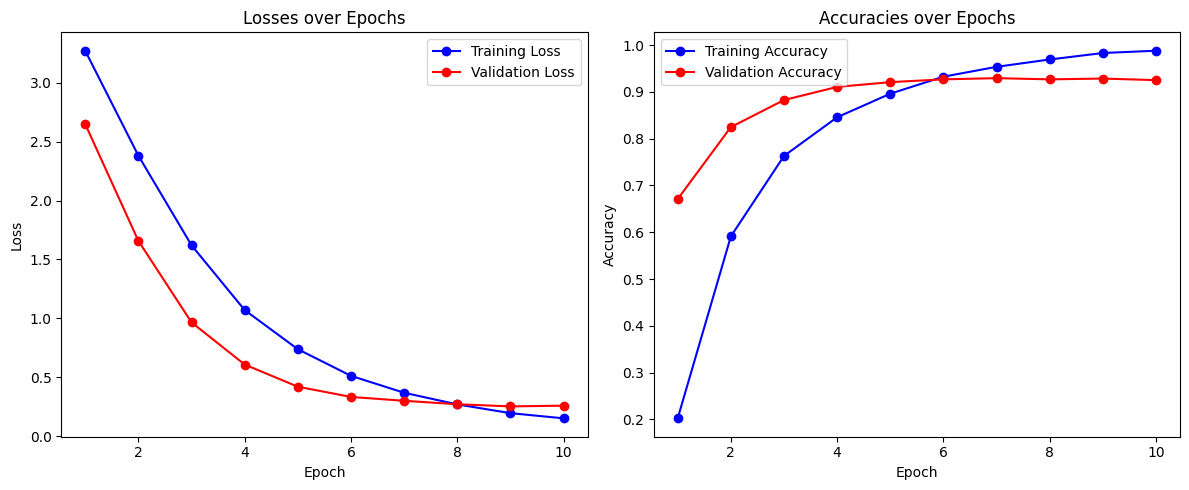

Training ResNet34 with SGD optimizer and learning rate 1e-05
Epoch 1/10, Training Loss: 0.1275, Training Accuracy: 0.9928
Validation Loss: 0.2560, Validation Accuracy: 0.9252
Epoch 2/10, Training Loss: 0.1169, Training Accuracy: 0.9947
Validation Loss: 0.2632, Validation Accuracy: 0.9192
Epoch 3/10, Training Loss: 0.1206, Training Accuracy: 0.9919
Validation Loss: 0.2519, Validation Accuracy: 0.9269
Epoch 4/10, Training Loss: 0.1265, Training Accuracy: 0.9904
Validation Loss: 0.2609, Validation Accuracy: 0.9218
Epoch 5/10, Training Loss: 0.1230, Training Accuracy: 0.9921
Validation Loss: 0.2596, Validation Accuracy: 0.9218
Epoch 6/10, Training Loss: 0.1252, Training Accuracy: 0.9909
Validation Loss: 0.2510, Validation Accuracy: 0.9277
Epoch 7/10, Training Loss: 0.1242, Training Accuracy: 0.9926
Validation Loss: 0.2565, Validation Accuracy: 0.9235
Epoch 8/10, Training Loss: 0.1206, Training Accuracy: 0.9938
Validation Loss: 0.2589, Validation Accuracy: 0.9218
Epoch 9/10, Training Loss: 

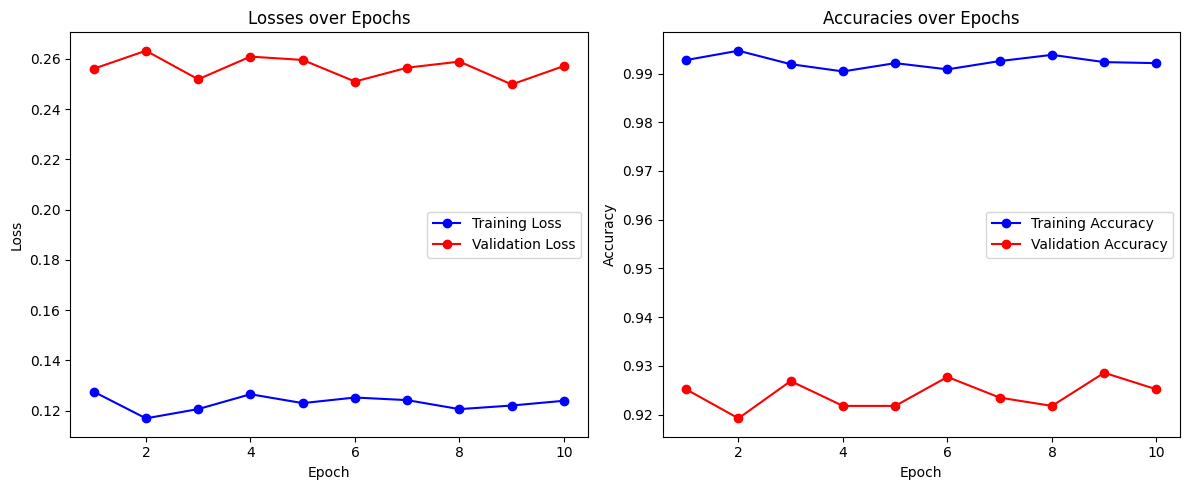

Training ResNet34 with Adam optimizer and learning rate 5e-05
Epoch 1/10, Training Loss: 0.1496, Training Accuracy: 0.9698
Validation Loss: 0.3231, Validation Accuracy: 0.9031
Epoch 2/10, Training Loss: 0.1294, Training Accuracy: 0.9681
Validation Loss: 0.3551, Validation Accuracy: 0.9005
Epoch 3/10, Training Loss: 0.0953, Training Accuracy: 0.9785
Validation Loss: 0.3765, Validation Accuracy: 0.8912
Epoch 4/10, Training Loss: 0.0852, Training Accuracy: 0.9770
Validation Loss: 0.3805, Validation Accuracy: 0.8946
Epoch 5/10, Training Loss: 0.0620, Training Accuracy: 0.9860
Validation Loss: 0.3504, Validation Accuracy: 0.9056
Epoch 6/10, Training Loss: 0.0498, Training Accuracy: 0.9898
Validation Loss: 0.3655, Validation Accuracy: 0.9048
Epoch 7/10, Training Loss: 0.0611, Training Accuracy: 0.9830
Validation Loss: 0.3712, Validation Accuracy: 0.9039
Epoch 8/10, Training Loss: 0.0414, Training Accuracy: 0.9904
Validation Loss: 0.3750, Validation Accuracy: 0.9158
Epoch 9/10, Training Loss:

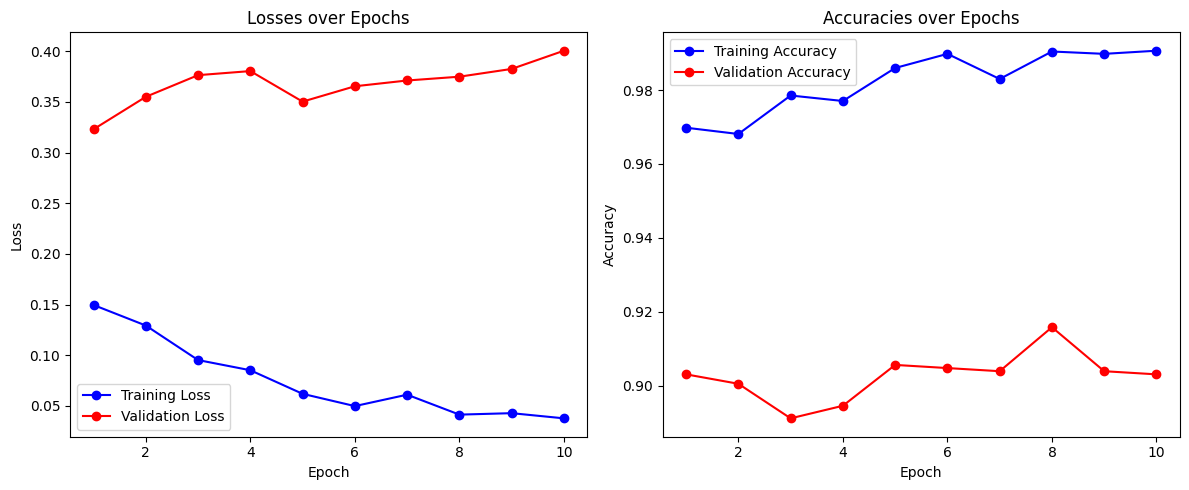

Training ResNet34 with SGD optimizer and learning rate 5e-05
Epoch 1/10, Training Loss: 0.0249, Training Accuracy: 0.9938
Validation Loss: 0.4067, Validation Accuracy: 0.9014
Epoch 2/10, Training Loss: 0.0267, Training Accuracy: 0.9936
Validation Loss: 0.4039, Validation Accuracy: 0.9005
Epoch 3/10, Training Loss: 0.0224, Training Accuracy: 0.9953
Validation Loss: 0.4018, Validation Accuracy: 0.9048
Epoch 4/10, Training Loss: 0.0217, Training Accuracy: 0.9955
Validation Loss: 0.3786, Validation Accuracy: 0.9039
Epoch 5/10, Training Loss: 0.0199, Training Accuracy: 0.9960
Validation Loss: 0.3958, Validation Accuracy: 0.9022
Epoch 6/10, Training Loss: 0.0185, Training Accuracy: 0.9970
Validation Loss: 0.4109, Validation Accuracy: 0.9014
Epoch 7/10, Training Loss: 0.0228, Training Accuracy: 0.9953
Validation Loss: 0.3855, Validation Accuracy: 0.9005
Epoch 8/10, Training Loss: 0.0240, Training Accuracy: 0.9936
Validation Loss: 0.3806, Validation Accuracy: 0.9048
Epoch 9/10, Training Loss: 

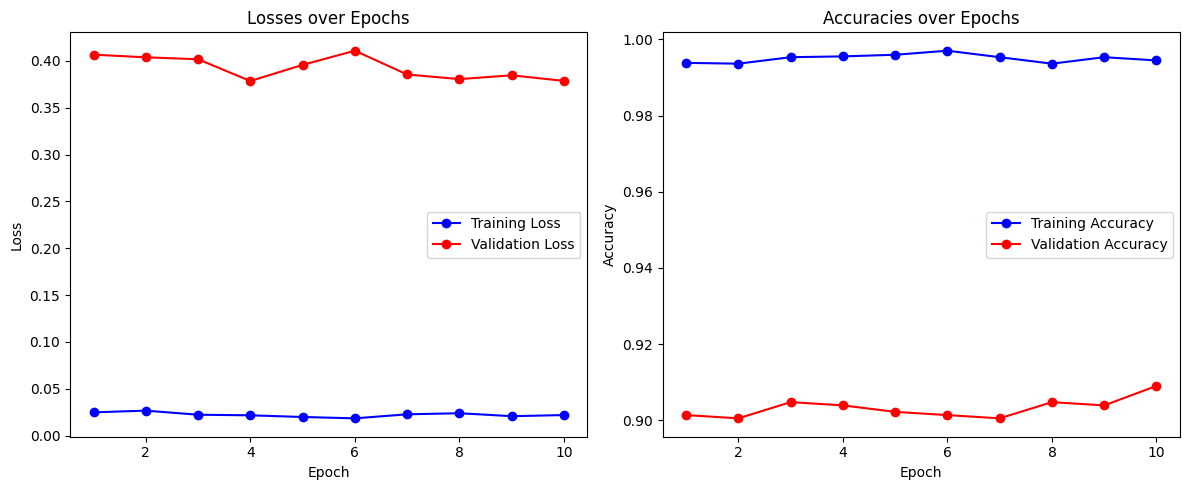

In [31]:
best_model_info = {
    'model': None,  # Store the actual model
    'model_name': None,
    'optimizer': None,
    'learning_rate': None,
    'accuracy': 0.0
}


for model, model_name in zip(models_list, model_names):
    for lr in learning_rates:
        for opt in optimizers:
            print(f"Training {model_name} with {opt} optimizer and learning rate {lr}")

            # Create optimizer
            optimizer = create_optimizer(model, opt, lr)

            # Track the best model and its performance
            train_losses, val_losses, train_accuracies, val_accuracies, best_model, best_val = train_model(model, criterion, optimizer, num_epochs=10)
            plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, num_epochs=10)

            if best_value > best_model_info['accuracy']:
                best_model_info['model'] = best_model
                best_model_info['model_name'] = model_name
                best_model_info['optimizer'] = opt
                best_model_info['learning_rate'] = lr
                best_model_info['accuracy'] = best_value

# Save the best model
if best_model_info['model'] is not None:
    torch.save(best_model_info['model'].state_dict(), 'best_model.pth')


In [35]:
print(f"Best Model: {best_model_info['model_name']}")
print(f"Optimizer: {best_model_info['optimizer']}")
print(f"Learning Rate: {best_model_info['learning_rate']}")
print(f"Validation Accuracy: {best_model_info['accuracy']:.4f}")


Best Model: ResNet50
Optimizer: Adam
Learning Rate: 1e-05
Validation Accuracy: 0.9320


In [36]:
# Evaluate on test_dataset
model = best_model_info['model']

# Load the saved state dictionary
model.load_state_dict(torch.load('best_model.pth', map_location=device))

# Move the model to the appropriate device
model.to(device)

# Evaluate the model on the test set
test_loss, test_accuracy = test_model(model, test_loader)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


<ipython-input-36-cd98fb5c174c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth', map_location=device))


Test Loss: 0.4074
Test Accuracy: 0.9075


In [37]:
def generate_predictions(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)


In [38]:
# Generate predictions on the test set
test_predictions, test_labels = generate_predictions(best_model_info['model'], test_loader)

In [41]:
def plot_confusion_matrix(preds, labels, class_names):
    cm = confusion_matrix(labels, preds, labels=[i for i in range(37)])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[i for i in range(37)])

    fig, ax = plt.subplots(figsize=(20, 10))
    disp.plot(ax=ax)
    plt.show()

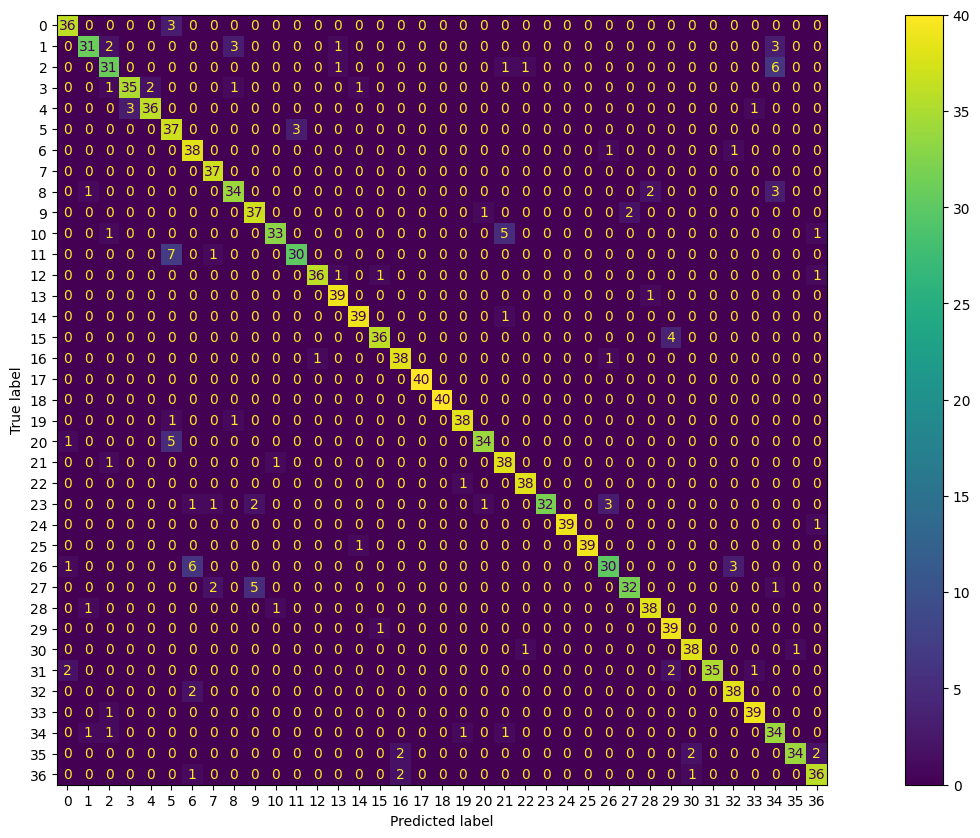

In [42]:
# Plot the confusion matrix
class_names = [str(i) for i in range(len(df['Class_ID'].unique()))]  # Replace with actual class names if available
plot_confusion_matrix(test_predictions, test_labels, class_names)

In [43]:
def plot_predictions(inputs, true_labels, pred_labels, class_names, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        img = inputs[i].cpu().permute(1, 2, 0).numpy()  # Move to CPU and reorder dimensions for plotting
        img = img * 255.0  # Denormalize if necessary

        plt.imshow(img.astype('uint8'))
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
        plt.axis('off')
    plt.show()


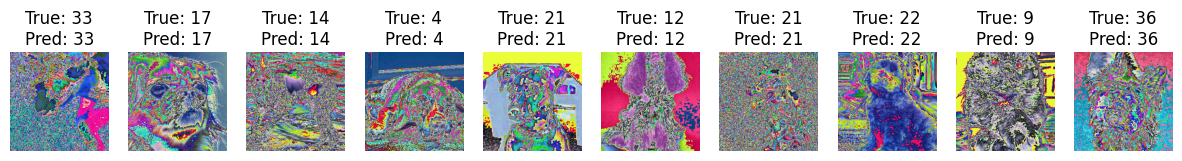

In [47]:
# Get some images from the test set to visualize
inputs, labels = next(iter(test_loader))  # Get a batch of images and labels from the test set

# Plot the first 5 images with their true and predicted labels
plot_predictions(inputs, labels.cpu().numpy(), test_predictions[:10], class_names, num_images=10)

# Another Trial with EffecientNetB0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 183MB/s]


EfficientNetB0 output features size: 1280
Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=Tr

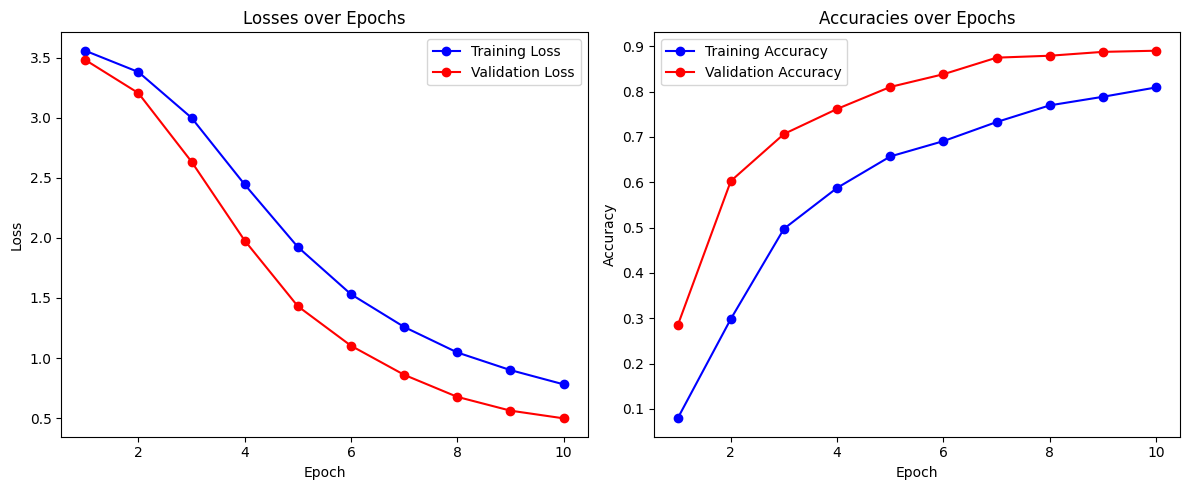

In [48]:
# Load pretrained EfficientNetB0 model
efficientnet_b0 = models.efficientnet_b0(pretrained=True)

# Remove the final fully connected layer (the classifier) to keep only the feature extraction layers
efficientnet_b0_features = nn.Sequential(*list(efficientnet_b0.children())[:-2])

# Pooling layer to adapt the output to a fixed size (e.g., (1, 1))
efficientnet_b0_pool = nn.AdaptiveAvgPool2d((1, 1))

# Initialize a dummy input to get the output size of the feature extractor
dummy_input = torch.zeros(1, 3, 224, 224)  # Adjust input size if necessary
with torch.no_grad():
    x = efficientnet_b0_features(dummy_input)
    x = efficientnet_b0_pool(x)
    out_features = x.numel()  # Get the number of features after pooling

print(f"EfficientNetB0 output features size: {out_features}")

# Define the custom layers
efficientnet_b0_custom = nn.Sequential(
    nn.Flatten(),  # Flatten the output from the pooling layer
    nn.Linear(out_features, 512),  # First custom fully connected layer
    nn.ReLU(),  # Activation function
    nn.Dropout(0.5),  # Dropout layer for regularization
    nn.Linear(512, len(df['Class_ID'].unique()))  # Final output layer (number of classes in your dataset)
)

# Combine the feature extractor and custom layers into the final model
efficientnet_b0_model = nn.Sequential(
    efficientnet_b0_features,
    efficientnet_b0_pool,
    efficientnet_b0_custom
)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
efficientnet_b0_model.to(device)

# Print to confirm the model architecture
print(efficientnet_b0_model)


optimizer = create_optimizer(efficientnet_b0_model, 'Adam', 0.00001)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses, train_accuracies, val_accuracies, best_model, best_val = train_model(efficientnet_b0_model, criterion, optimizer, num_epochs=10)
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, num_epochs=10)


In [49]:
# Evaluate the model on the test set
test_loss, test_accuracy = test_model(efficientnet_b0_model, test_loader)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5133
Test Accuracy: 0.8932
